In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import regex as re

In [2]:
asthma_df = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")
asthma_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2016,2016,AR,Arkansas,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,5,AST,AST2_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2017,2017,AZ,Arizona,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,4,AST,AST2_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2016,2016,CA,California,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,6,AST,AST2_1,NMBR,RACE,BLK,NaN,NaN,NaN,NaN
3,2015,2015,CO,Colorado,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,8,AST,AST2_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2017,2017,CO,Colorado,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,8,AST,AST2_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [3]:
asthma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80342 entries, 0 to 80341
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  80342 non-null  int64  
 1   YearEnd                    80342 non-null  int64  
 2   LocationAbbr               80342 non-null  object 
 3   LocationDesc               80342 non-null  object 
 4   DataSource                 80342 non-null  object 
 5   Topic                      80342 non-null  object 
 6   Question                   80342 non-null  object 
 7   Response                   0 non-null      float64
 8   DataValueUnit              71930 non-null  object 
 9   DataValueType              80342 non-null  object 
 10  DataValue                  39846 non-null  float64
 11  DataValueAlt               39846 non-null  float64
 12  DataValueFootnoteSymbol    41684 non-null  object 
 13  DatavalueFootnote          41684 non-null  obj

In [5]:
asthma_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [6]:
data_2021 = asthma_df[(asthma_df['YearStart'] == 2021)]

In [7]:
#Extract only the rows where 'StratificationCategory1' is 'Gender'
gender_data = data_2021[data_2021['StratificationCategory1'] == 'Gender']
# Display the extracted gender data
print("\nGender Data:")
print(gender_data)
# Extract only the rows where 'StratificationCategory1' is 'Race/Ethnicity'
ethnicity_data = data_2021[data_2021['StratificationCategory1'] == 'Race/Ethnicity']
# Display the extracted ethnicity data
print("\nRace/Ethnicity Data:")
print(ethnicity_data)

gender_data.head()

ethnicity_data.head()


Gender Data:
       YearStart  YearEnd LocationAbbr  LocationDesc DataSource   Topic  \
28958       2021     2021           OR        Oregon      BRFSS  Asthma   
28983       2021     2021           PA  Pennsylvania      BRFSS  Asthma   
28988       2021     2021           NE      Nebraska      BRFSS  Asthma   
29029       2021     2021           AR      Arkansas      BRFSS  Asthma   
29042       2021     2021           AZ       Arizona      BRFSS  Asthma   
...          ...      ...          ...           ...        ...     ...   
80038       2021     2021           WY       Wyoming      BRFSS  Asthma   
80088       2021     2021           WY       Wyoming      BRFSS  Asthma   
80093       2021     2021           WY       Wyoming      BRFSS  Asthma   
80188       2021     2021           WY       Wyoming      BRFSS  Asthma   
80243       2021     2021           WY       Wyoming      BRFSS  Asthma   

                                                                                     

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
170,2021,2021,OH,Ohio,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,39,AST,AST1_1,CRDPREV,RACE,MRC,NaN,NaN,NaN,NaN
28943,2021,2021,OK,Oklahoma,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,40,AST,AST1_1,CRDPREV,RACE,MRC,NaN,NaN,NaN,NaN
28968,2021,2021,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,31,AST,AST1_1,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN
28982,2021,2021,PA,Pennsylvania,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,42,AST,AST1_1,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
28985,2021,2021,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,31,AST,AST1_1,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


In [8]:
asthma_gender_df = pd.DataFrame(gender_data)

asthma_race_df = pd.DataFrame(ethnicity_data)

In [56]:
asthma_gender_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
28958,2021,2021,OR,Oregon,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Crude Prevalence,...,41,AST,AST6_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
28983,2021,2021,PA,Pennsylvania,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Crude Prevalence,...,42,AST,AST5_2,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
28988,2021,2021,NE,Nebraska,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,31,AST,AST6_1,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
29029,2021,2021,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,5,AST,AST1_1,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
29042,2021,2021,AZ,Arizona,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Crude Prevalence,...,4,AST,AST6_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80038,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Crude Prevalence,...,56,AST,AST6_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
80088,2021,2021,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Crude Prevalence,...,56,AST,AST5_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
80093,2021,2021,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST5_2,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
80188,2021,2021,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,56,AST,AST1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [9]:
asthma_race_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
170,2021,2021,OH,Ohio,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,39,AST,AST1_1,CRDPREV,RACE,MRC,NaN,NaN,NaN,NaN
28943,2021,2021,OK,Oklahoma,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,40,AST,AST1_1,CRDPREV,RACE,MRC,NaN,NaN,NaN,NaN
28968,2021,2021,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,31,AST,AST1_1,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN
28982,2021,2021,PA,Pennsylvania,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,42,AST,AST1_1,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
28985,2021,2021,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Crude Prevalence,...,31,AST,AST1_1,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80143,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Crude Prevalence,...,56,AST,AST6_1,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN
80169,2021,2021,WY,Wyoming,BRFSS,Asthma,Asthma prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,56,AST,AST1_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
80190,2021,2021,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST5_2,AGEADJPREV,RACE,OTH,NaN,NaN,NaN,NaN
80194,2021,2021,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Crude Prevalence,...,56,AST,AST5_1,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN


In [11]:
asthma_race_df.to_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv", index=False)

asthma_gender_df.to_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv", index=False)

In [12]:
overall_data = data_2021[data_2021['StratificationCategory1'] == 'Overall']
# Display the extracted ethnicity data
print("\nOverall Data:")
print(overall_data)


Overall Data:
       YearStart  YearEnd LocationAbbr          LocationDesc DataSource  \
171         2021     2021           OH                  Ohio      BRFSS   
28974       2021     2021           NE              Nebraska      BRFSS   
29005       2021     2021           ND          North Dakota      BRFSS   
29043       2021     2021           AZ               Arizona      BRFSS   
29076       2021     2021           DC  District of Columbia      BRFSS   
...          ...      ...          ...                   ...        ...   
80020       2021     2021           WY               Wyoming      BRFSS   
80220       2021     2021           WY               Wyoming      BRFSS   
80227       2021     2021           WY               Wyoming      BRFSS   
80228       2021     2021           WY               Wyoming      BRFSS   
80255       2021     2021           WY               Wyoming      BRFSS   

        Topic  \
171    Asthma   
28974  Asthma   
29005  Asthma   
29043  Asthma   

In [13]:
asthma_overall_df = pd.DataFrame(overall_data)

In [14]:
asthma_overall_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
171,2021,2021,OH,Ohio,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,39,AST,AST1_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
28974,2021,2021,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,31,AST,AST1_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
29005,2021,2021,ND,North Dakota,BRFSS,Asthma,Asthma prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,38,AST,AST1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
29043,2021,2021,AZ,Arizona,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Age-adjusted Prevalence,...,4,AST,AST6_2,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
29076,2021,2021,DC,District of Columbia,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,11,AST,AST5_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80020,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST6_2,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
80220,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Crude Prevalence,...,56,AST,AST6_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
80227,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST6_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
80228,2021,2021,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST5_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [15]:
asthma_overall_df.to_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv", index=False)

In [24]:
# Visualization using Matplotlib (Python)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
import pandas as pd

# Load the data and inspect the columns
gender_data = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")
print(gender_data.columns)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


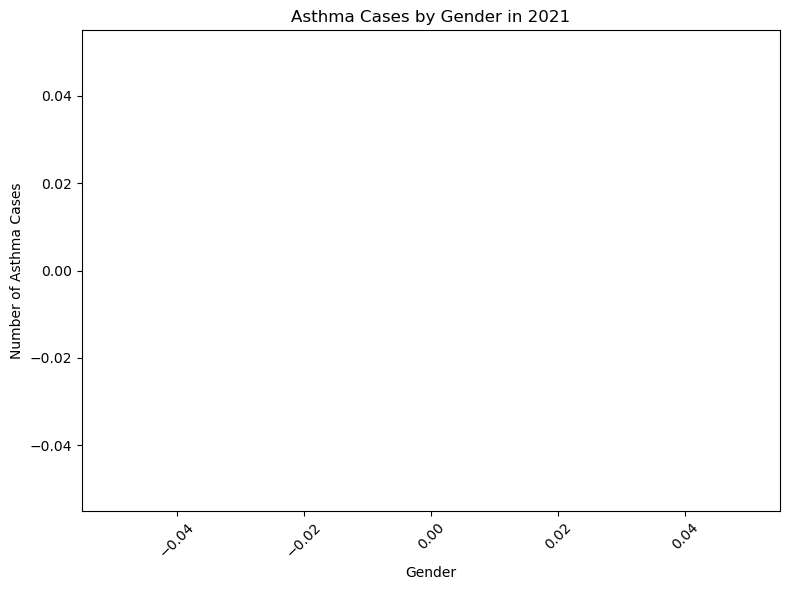

In [25]:

# Load the gender data from CSV
gender_data = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")

# Filter the data to only include gender-related entries
gender_data_filtered = gender_data[gender_data['StratificationCategory1'] == 'Gender']

# Group by 'Stratification1' (gender values) and sum the asthma cases
gender_grouped = gender_data_filtered.groupby('Stratification1')['DataValue'].sum().reset_index()

# Create a bar chart for asthma cases by gender
plt.figure(figsize=(8, 6))
plt.bar(gender_grouped['Stratification1'], gender_grouped['DataValue'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Number of Asthma Cases')
plt.title('Asthma Cases by Gender in 2021')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('asthma_cases_by_gender_2021.png')

# Show the plot
plt.show()

